"\nfor index in range(0, 10):\n    trajectory = results[index]\n    plt.plot(trajectory['time'], trajectory['molecule'], 'r')\n"

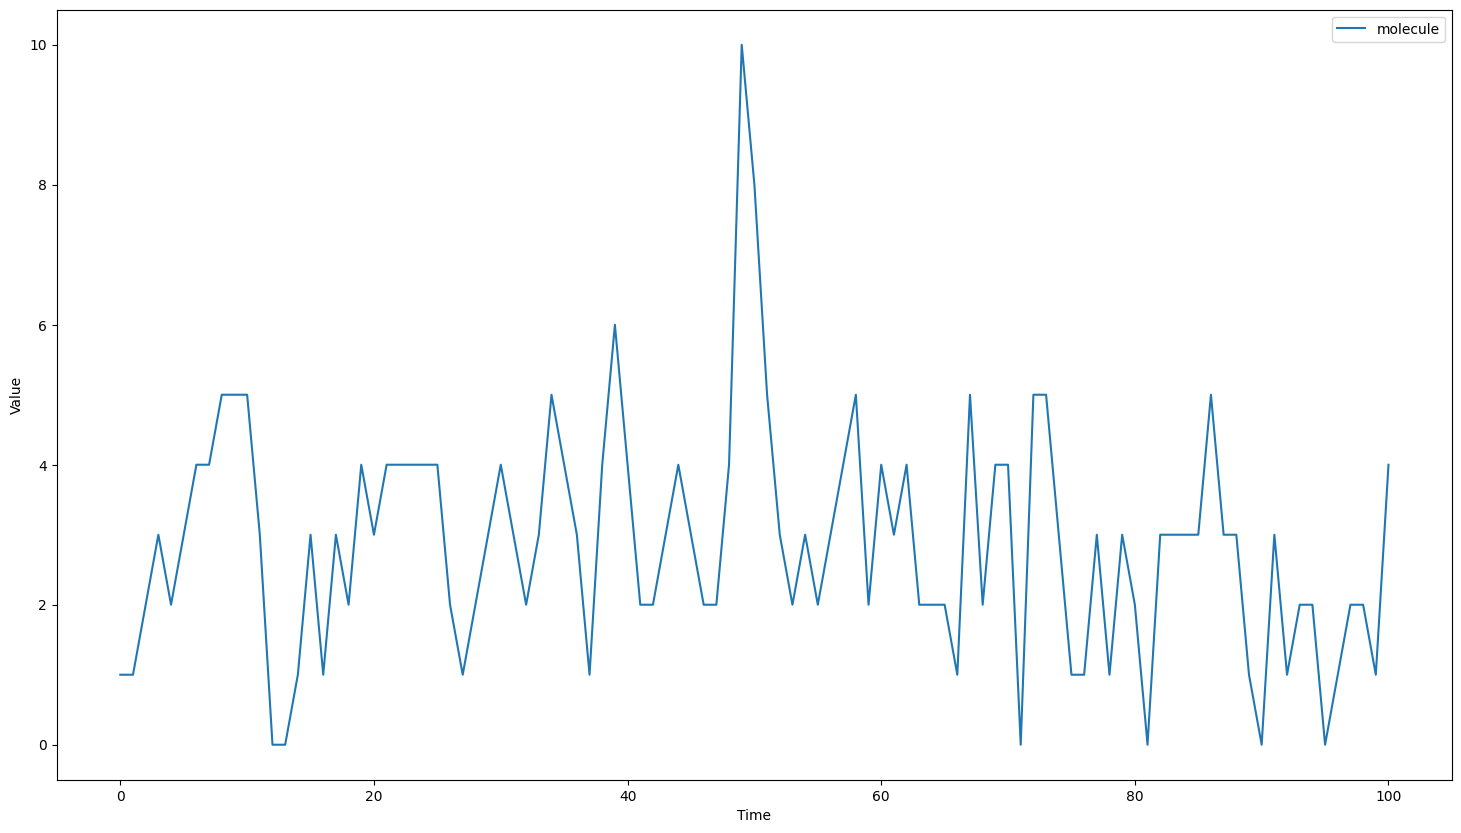

In [184]:
import gillespy2
import matplotlib.pyplot as plt

def create_birth_death(parameter_values=None):
    # First call the gillespy2.Model initializer.
    model = gillespy2.Model(name='birth_death')

    # Define parameters for the rates of creation and dissociation.
    k_0 = gillespy2.Parameter(name='k_0', expression=3)
    k_1 = gillespy2.Parameter(name='k_1', expression=1)
    model.add_parameter([k_0,k_1])

    # Define variables for the molecular species representing M and D.
    m = gillespy2.Species(name='molecule', initial_value=1)
    model.add_species([m])

    # The list of reactants and products for a Reaction object are each a
    # Python dictionary in which the dictionary keys are Species objects
    # and the values are stoichiometries of the species in the reaction.
    r_c = gillespy2.Reaction(name="m_creation", rate=k_0, reactants={}, products={m:1})
    r_d = gillespy2.Reaction(name="m_destruction", rate=k_1, reactants={m:1}, products={})
    model.add_reaction([r_c, r_d])

    # Set the timespan for the simulation.
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=101)
    model.timespan(tspan)
    return model

model = create_birth_death()
results = model.run(number_of_trajectories=1)

results.plot()

"""
for index in range(0, 10):
    trajectory = results[index]
    plt.plot(trajectory['time'], trajectory['molecule'], 'r')
"""

In [96]:
trajectory = list(results['molecule'])
trajectory
p = [trajectory.count(x) / len(trajectory) for x in range(0,int(max(trajectory)) + 1)]
print(f"p: {p}")
print(f"traj: {trajectory}")

p: [0.050994900509949, 0.1538846115388461, 0.22797720227977203, 0.22317768223177684, 0.1680831916808319, 0.09459054094590541, 0.0496950304969503, 0.0207979202079792, 0.008099190080991902, 0.001999800019998, 0.0006999300069993001]
traj: [1.0, 4.0, 2.0, 4.0, 2.0, 3.0, 2.0, 1.0, 1.0, 3.0, 3.0, 0.0, 2.0, 4.0, 1.0, 3.0, 3.0, 3.0, 7.0, 5.0, 6.0, 3.0, 4.0, 4.0, 0.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 0.0, 4.0, 0.0, 4.0, 2.0, 4.0, 3.0, 2.0, 4.0, 2.0, 2.0, 2.0, 3.0, 7.0, 7.0, 0.0, 3.0, 4.0, 1.0, 2.0, 2.0, 1.0, 1.0, 3.0, 2.0, 4.0, 3.0, 4.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 4.0, 7.0, 9.0, 5.0, 3.0, 4.0, 8.0, 3.0, 5.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 6.0, 4.0, 4.0, 5.0, 5.0, 3.0, 2.0, 1.0, 3.0, 4.0, 5.0, 4.0, 3.0, 1.0, 1.0, 4.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 4.0, 7.0, 6.0, 7.0, 4.0, 3.0, 1.0, 4.0, 8.0, 1.0, 3.0, 4.0, 5.0, 2.0, 5.0, 5.0, 3.0, 1.0, 0.0, 2.0, 1.0, 6.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 4.0, 3.0, 2.0, 1.0, 4.0, 5.0, 4.0, 4.0, 4.0, 8.0, 2.0, 2.0, 1.0, 1.0, 4.0, 6.0, 7.0

In [203]:
print("pQ = 0")
print(p[1]/p[0])
print((p[1] - p[2])/(p[0] - p[1]))
print((p[2] - p[3])/(p[1] - p[2]))
print((p[3] - p[4])/(p[2] - p[3]))
print("Qp = 0")
print(p[0]/(p[1] - p[0]))
print((p[1] - p[0])/(p[2] - p[1]))


pQ = 0
3.0176470588235293
0.720116618075802
-0.06477732793522256
11.47916666666669
Qp = 0
0.4956268221574344
1.3886639676113357


(array([163.,   0.,   0.,   0.,   0.,   0., 578.,   0.,   0.,   0.,   0.,
          0., 134.,   0.,   0.,   0.,   0.,   0.,  60.,   0.,   0.,   0.,
          0.,   0.,   0.,  36.,   0.,   0.,   0.,   0.,   0.,  15.,   0.,
          0.,   0.,   0.,   0.,   8.,   0.,   0.,   0.,   0.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
        1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
        3.52, 3.68, 3.84, 4.  , 4.16, 4.32, 4.48, 4.64, 4.8 , 4.96, 5.12,
        5.28, 5.44, 5.6 , 5.76, 5.92, 6.08, 6.24, 6.4 , 6.56, 6.72, 6.88,
        7.04, 7.2 , 7.36, 7.52, 7.68, 7.84, 8.  ]),
 <BarContainer object of 50 artists>)

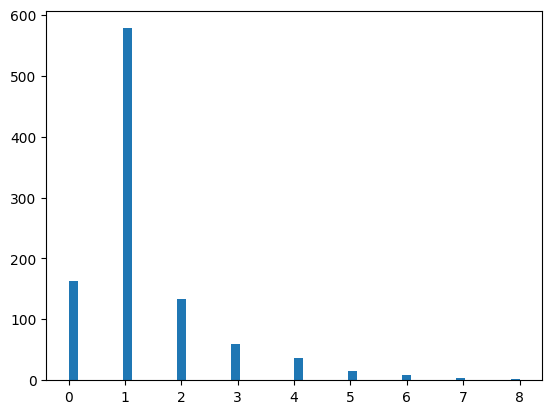

In [231]:
import random, math

def simulate(x0, lamb0, mu0, tmax = 100):
    """
    None (lamb) -> M
    M (mu) -> None (death rate 0 if no molecules)
    simulate exponential time until event
    simulate probability of death or birth event
    """
    tmax = tmax
    t = 0
    x = x0
    path = [x]
    path_time = [t]
    while t < tmax:
        lamb = lamb0
        mu = mu0
        if x == 0:
            mu = 0
        rate = lamb + mu
        urv = random.random()
        if urv > lamb/rate:
            x -= 1
        else:
            x += 1
        path.append(x)
        path_time.append(t)
        t += -math.log(random.random()) / rate

    return path, path_time

def sample(x0, lamb0, mu0, tmax, n):
    """
    Simulate n 'runs' of reaction until time tmax
    Take final # of molecules
    Gives n size sample of stationary 'distribution' (unormalised + only 1 reactant)
    """
    m_list = []
    for i in range(n):
        path, path_time = simulate(x0, lamb0, mu0, tmax)
        m_list.append(path[-1])

    return m_list



#path, path_time = simulate(1,1,1,100)
#print(path)
#plt.step(path_time, path)
p_list = sample(1,0.5,1,1000,1000)
plt.hist(p_list,bins=50)


In [236]:
p = [p_list.count(x) / len(p_list) for x in range(0,int(max(p_list)) + 1)]
print("Qp = 0")
print(p[0]/(p[1] - p[0]))
print((p[1] - p[0])/(p[2] - p[1]))

Qp = 0
0.3927710843373495
-0.9346846846846846


### Constant Birth Death
Implementation of the Gillespie algorithm to sample and approximate the stationary distribution of a birth death process with constant rates (but u_0 = 0)

In [384]:
""""
Simulate paths for birth-death process using Gillespie algorithm
- assume constant birth and death rates, state space N
- birth rate = lambda, death rate = mu
- qi,i+1 = lambda, qi,i-1 = mu, qi,i = -(lambda + mu)

inputs:
initial state
lambda
mu
stopping time
"""

def sample_path(x0, lam, mu, tmax, plot=False):
    # initialise time and state (also store jump times)
    t = 0
    path = [x0]
    jump_times = [0]

    # simulate until stopping time
    while t < tmax:
        # simulate holding time of current state i
        i = path[-1]
        # Unif[0,1], tranform to exponential with rate -qi,i

        # note: need to add q0,0 = -lam, special case
        if i == 0:
            t_hold = - math.log(random.random()) / lam
        else:
            t_hold = - math.log(random.random()) / (lam + mu)
        t += t_hold
        jump_times.append(t)

        # simulate using jump probability

        # note: if state i = 0, cannot have a death/decay (i.e. u0 = 0)
        if i == 0:
            path.append(i + 1)
        # otherwise: P(birth jump) = lamba / (lambda + mu)
        else:
            u = random.random()
            if u < lam / (lam + mu):
                # j = i + 1 (birth)
                path.append(i + 1)
            else:
                # j = i - 1 (death)
                path.append(i - 1)

    if plot:
        plt.step(jump_times, path, where="post")

    return path, jump_times

In [385]:
"""
Approximate stationary dist of process via simulation
- simulate n paths of process until time tmax
- tmax sufficiently large => marginal dist at tmax should approx stat dist
- use final state as a sample from stat dist, use to approx

inputs:
initial state, lambda, mu, stopping time (tmax)
number of samples: n
"""

def sample_dist(x0, lam, mu, tmax, n, plot=False):
    final_states = []
    # simulate n paths and store final states
    # (note: final state is last state with a simulated holding time)
    # (despite simulating a final jump)
    for i in range(n):
        path, jumps = sample_path(x0, lam, mu, tmax, plot=plot)
        final_states.append(path[-2])
    
    plt.show()

    # then count the number of occurances of each state and normalise
    stat_approx = [final_states.count(i) / n for i in range(0,max(final_states) + 1)]

    return stat_approx

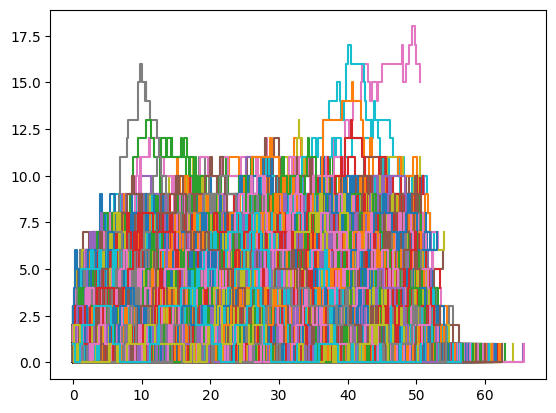

[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625]
[0.4938, 0.2536, 0.1231, 0.0669, 0.0321, 0.0153, 0.0075, 0.0042, 0.0017, 0.0014, 0.0002, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0001]


In [392]:
# actual stationary distribution
lam = 0.5
mu = 1
true_dist = [(1 - lam/mu)*(lam/mu)**i for i in range(0,10)]

# estimated stationary distribution from 1000 samples of length 100
dist = sample_dist(1, lam, mu, 50, 10000, plot=True)

# comparse true and estimated distributions
print(true_dist)
print(dist)

### Schlogl's Model
Implementation of the Gillespie algorithm to sample and approximate the stationary distribution of Sclogl's model

2S <=> 3S , 0 <=> S

In [1]:
import matplotlib.pyplot as plt
import math, random
import numpy as np

In [4]:
""""
Simulate paths using Gillespie algorithm
- start in state x
- qx,x+1, qx,x-1 and qx,x are the only nonzero transition rates


inputs:
initial state
k1, k2, k3, k4 parameters
stopping time
"""

def sample_path_schlogl(x0, params, tmax, plot=False):
    # initialise time and state (also store jump times)
    t = 0
    path = [x0]
    jump_times = [0]
    k1, k2, k3, k4 = params[0], params[1], params[2], params[3]

    # simulate until stopping time
    while t < tmax:
        # simulate holding time of current state x
        x = int(path[-1])
        # define rates
        qxplus = k1*x*(x-1) + k3
        qxminus = k2*x*(x-1)*(x-2) + k4*x
        # Unif[0,1], tranform to exponential holding time with rate -qx,x
        t_hold = -math.log(random.random()) / (qxplus + qxminus)
        t += t_hold
        jump_times.append(t)

        # simulate using jump probability

        # otherwise: P(x -> x+1) = qxplus / (qxplus + qxminus)
        u = random.random()
        if u < qxplus / (qxplus + qxminus):
            # x -> x + 1 (birth)
            path.append(x + 1)
        else:
            # x -> x - 1 (death)
            path.append(x - 1)

    if plot:
        plt.step(jump_times, path, where="post")

    return path, jump_times

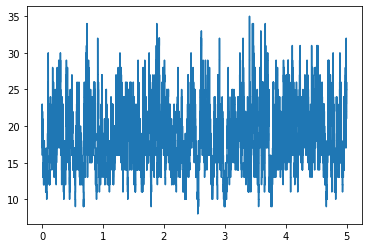

In [48]:
sample_path_schlogl(20,[6,1/3,50,3],5,plot=True);

In [13]:
"""
Approximate stationary dist of process via simulation
- simulate n paths of process until time tmax
- tmax sufficiently large => marginal dist at tmax should approx stat dist
- use final state as a sample from stat dist, use to approx

inputs:
initial state, params, stopping time (tmax)
number of samples: n
"""

def sample_dist(x0, params, tmax, n, plot=False):
    final_states = []
    # simulate n paths and store final states
    # (note: final state is last state with a simulated holding time)
    # (despite simulating a final jump)
    for i in range(n):
        path, jumps = sample_path_schlogl(x0, params, tmax, plot=plot)
        final_states.append(path[-2])
    
    plt.show()

    # then count the number of occurances of each state and normalise
    stat_approx = [final_states.count(i) / n for i in range(0,max(final_states) + 1)]

    return stat_approx

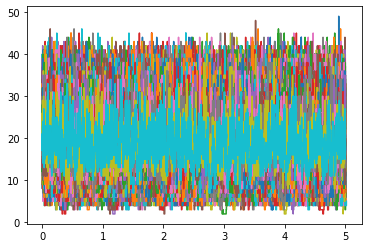

[0.0, 0.0, 0.0, 0.0001, 0.0001, 0.0004, 0.0011, 0.0019, 0.0041, 0.0077, 0.0149, 0.0242, 0.0401, 0.0551, 0.0632, 0.0775, 0.0906, 0.0931, 0.0906, 0.0899, 0.0784, 0.0672, 0.0579, 0.0431, 0.0319, 0.0245, 0.0183, 0.011, 0.0048, 0.0031, 0.0022, 0.0011, 0.001, 0.0004, 0.0001, 0.0001, 0.0003]


In [51]:
params = [6,1/3,50,3]

# estimated stationary distribution from 1000 samples of length 100
dist = sample_dist(20, params, 5, 10000, plot=True)

print(dist)

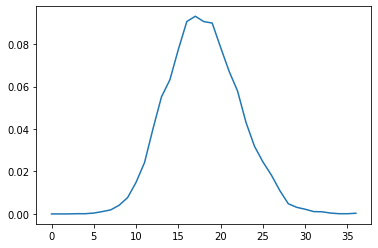

In [52]:
# plot of distribution
plt.plot(dist)

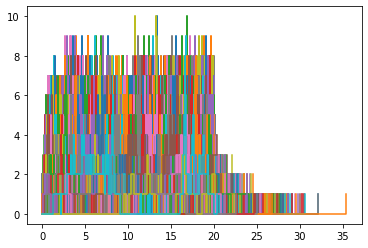

[0.5449, 0.3191, 0.1003, 0.0287, 0.0055, 0.0011, 0.0004]


In [64]:
params = [1,1,0.6,1]

# estimated stationary distribution from 1000 samples of length 100
dist = sample_dist(0, params, 20, 10000, plot=True)

print(dist)

# Bootstrap simulation

Method:
- simulate path up to time t (sufficiently large for stationarity)
- record final state (sample from stationary distribution)
- repeat for n samples

bootstrap
- sample with replacement to obtain N bootstrap samples from the M values
- calculate the proportion of states x for each sample (estimate of p(x))
- find Confidence Interval for estimate


In [22]:
def sample_path(x0, lam, mu, tmax, plot=False):
    """
    Simulate a sample path of birth death process
    start at state x0, run until time tmax, rates lam, mu
    return visited states and jump times
    """

    # initialise time and state (also store jump times)
    t = 0
    path = [x0]
    jump_times = [0]

    # simulate until stopping time
    while t < tmax:
        # simulate holding time of current state i
        i = path[-1]

        birth_rate = lam
        if i == 0:
            death_rate = 0
        else:
            death_rate = mu
        # holding time
        t_hold = -math.log(random.random()) / (birth_rate + death_rate)
        t += t_hold
        jump_times.append(t)

        # simulate jump 
        # NOTE: i = 0 => death_rate = 0, so always birth
        u = random.random()
        if u < birth_rate / (birth_rate + death_rate):
            # j = i + 1 (birth)
            path.append(i + 1)
        else:
            # j = i - 1 (death)
            path.append(i - 1)

    if plot:
        plt.step(jump_times, path, where="post")

    return path, jump_times

def bootstrap(x_list, x0, lam, mu, tmax, n, N, plot=False, printing=False):
    """
    x_list = states to calculate probabilities for
    x0 = initial state
    lam, mu = rates
    tmax = time until sample
    n = number of simulated samples
    N = number of bootstrap samples
    """

    # simulate n samples
    states = []
    for i in range(n):
        path, jumps = sample_path(x0, lam, mu, tmax, plot=plot)
        states.append(path[-2])
    plt.show()

    # simulate N bootstrap samples: estimates p(x) for each, and for each x
    estimates = [[] for x in x_list]
    for i in range(N):
        sample = random.choices(states,k = n)
        for i, x in enumerate(x_list):
            estimates[i].append(sample.count(x) / n)

    # create confidence intervals (95%) via 2.5%, 97.5% quantiles for each x
    intervals = [np.quantile(est,[0.025,0.975]) for est in estimates]
    
    # plot histograms and CI
    for i, x in enumerate(x_list):
        if printing:
            print(f"95% CI for p({x}) is: ({intervals[i][0]}, {intervals[i][1]})")
        if plot:
            plt.hist(estimates[i])
            plt.title(f"Hist of p({x})")
            plt.axvline(intervals[i][0], color="red")
            plt.axvline(intervals[i][1], color="red")
            plt.show()

    # return CIs
    return estimates, intervals

    """
    Single x code

    # simulate N bootstrap samples: estimate p(x) for each
    estimates = []
    for i in range(N):
        sample = random.choices(states,k = n)
        estimates.append(sample.count(x) / n)

    # create confidence interval (95%) via 2.5%, 97.5% quantiles
    interval = np.quantile(estimates,[0.025,0.975])
    print(f"95% CI for p({x}) is: ({interval[0]}, {interval[1]})")

    # plot histogram and CI
    plt.hist(estimates)
    plt.title(f"Hist of p({x})")
    plt.axvline(interval[0], color="red")
    plt.axvline(interval[1], color="red")
    """

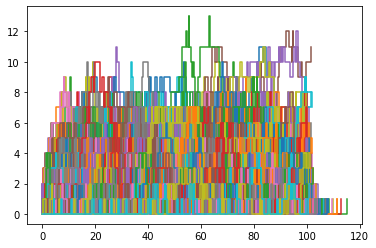

95% CI for p(0) is: (0.452, 0.514)


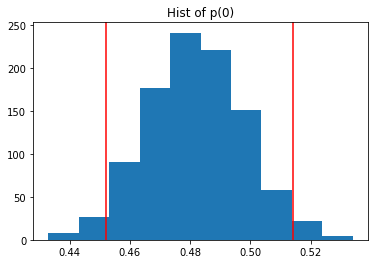

95% CI for p(1) is: (0.240975, 0.296025)


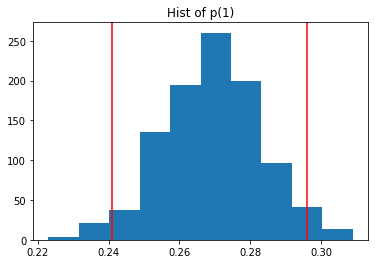

95% CI for p(2) is: (0.111, 0.154)


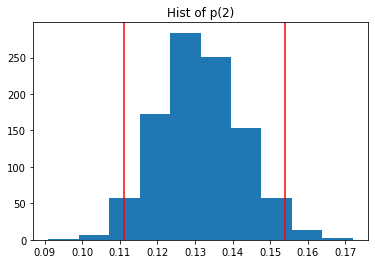

In [23]:
estimates, intervals = bootstrap([x for x in range(3)],0,0.5,1,100,1000,1000,plot=True,printing=True)

In [24]:
intervals

[array([0.452, 0.514]), array([0.240975, 0.296025]), array([0.111, 0.154])]

# Analysis
- use width of CI as measure of variance
- find CI for variety of stationary distributions
- plot CI width against true prob value


C:\Users\willi\AppData\Local\Temp\ipykernel_30580\546057611.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  t_hold = -math.log(random.random()) / (birth_rate + death_rate)
C:\Users\willi\AppData\Local\Temp\ipykernel_30580\546057611.py:31: RuntimeWarning: invalid value encountered in double_scalars
  if u < birth_rate / (birth_rate + death_rate):


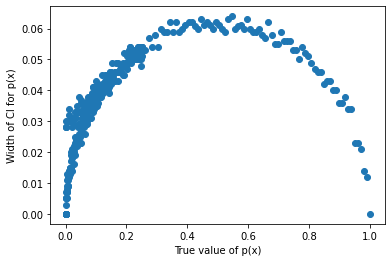

In [6]:
def width(intervals):
    return [interval[1] - interval[0] for interval in intervals]

# estimate 
x_max = 4
true_p = []
variance = []
for k1 in np.linspace(0,1,100):
    estimates, intervals = bootstrap([x for x in range(x_max)],0,k1,1,100,1000,1000,plot=False)
    # compute widths of intervals
    widths = width(intervals)
    variance.extend(widths)
    # plot against true stat dist
    dist = [(1 - k1)*(k1)**i for i in range(x_max)]
    true_p.extend(dist)
plt.scatter(true_p,variance)
plt.xlabel("True value of p(x)")
plt.ylabel("Width of CI for p(x)")
plt.show()

Now try comparing true values of p(x) against width of Kr intervals

idea:
- find bootstrap CI for p(x)'s for value of k1
- use CI's as bounds for LP
- find width of solution interval: max kr - min kr
- plot solution width against ???

In [7]:
import cvxpy as cv

Creat a Birth Death LP function that allows specific equation numbers

In [8]:
def birth_death_LP(indices, pl, pu, printing=False):
    """
    indices = list of indices of equations/rows of Q to use for constraints
    NOTE: index equations from zero
    pl = array of lower bounds on p (enough for equations used)
    pu = array of upper bounds on p ( == )

    returns:
    lower bound on k1
    upper bound on k1
    """

    # number of equations used (rows of Q) = largest equation index (+1)
    N = max(indices) + 1

    # NOTE: define one extra row and cut off, since square matrix would leave out
    # upper diagonal elements on Nth row

    # create Qr matrices
    Q1 = (np.diag(np.ones(N),-1) + np.diag(-np.ones(N + 1),0))[:-1, :]
    Q2 = (np.diag(np.ones(N),1) + np.diag(-np.ones(N + 1),0))[:-1, :]
    Q2[0,0] = 0

    # set rows to zero if equations not wanted
    for i in range(N):
        if i not in indices:
            Q1[i,:] = 0
            Q2[i,:] = 0

    # NOTE: add error for when pl, pu too small for number of equations
    # equation i involves p(i + 1)
    # so max index i => need bounds on p(i + 1), need length i + 2 = N + 1 pl/pu

    # define bounds 
    pl = np.array(pl)[:N + 1]
    pu = np.array(pu)[:N + 1]

    # NOTE: truncate to N + 1, as tridiagonal, so Nth equation has N+1 p's

    # Construct the problem.
    k1 = cv.Variable(1)
    k2 = 1
    z1 = cv.Variable(N + 1)
    z2 = cv.Variable(N + 1)
    objective_max = cv.Maximize(k1)
    objective_min = cv.Minimize(k1)
    constraints = [Q1 @ z1 + Q2 @ z2 == 0,
                k1 >= 0,
                z1 >= k1 * pl,
                z1 <= k1 * pu,
                z2 >= k2 * pl,
                z2 <= k2 * pu]
    prob_max = cv.Problem(objective_max, constraints)
    prob_min = cv.Problem(objective_min, constraints)   

    # Print result.
    result_max = prob_max.solve()
    if printing:
        print("\nThe upper bound is", prob_max.value)
        print("A solution k1 is")
        print(k1.value)
    max_bound = k1.value
    result_min = prob_min.solve()
    if printing:
        print("\nThe lower bound is", prob_min.value)
        print("A solution k1 is")
        print(k1.value)
    min_bound = k1.value
    
    return min_bound, max_bound

In [12]:
# create confidence intervals
k1_true = 0.5
x_max = 3
estimates, intervals = bootstrap([x for x in range(x_max)],0,k1_true,1,100,1000,1000)

# create bounds on p
pl = [intv[0] for intv in intervals]
pu = [intv[1] for intv in intervals]

# use as bounds for BD LP
lb, ub = birth_death_LP([1],pl,pu,printing=True)


The upper bound is 0.7618684953268053
A solution k1 is
[0.7618685]

The lower bound is 0.18064515611867615
A solution k1 is
[0.18064516]


Attempt to plot width of solution interval against p(0) and p(1)

C:\Users\willi\AppData\Local\Temp\ipykernel_30580\546057611.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  t_hold = -math.log(random.random()) / (birth_rate + death_rate)
C:\Users\willi\AppData\Local\Temp\ipykernel_30580\546057611.py:31: RuntimeWarning: invalid value encountered in double_scalars
  if u < birth_rate / (birth_rate + death_rate):


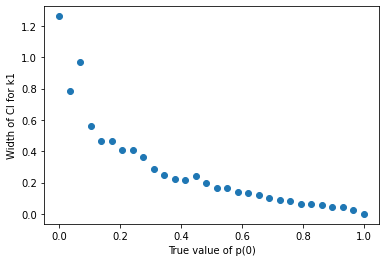

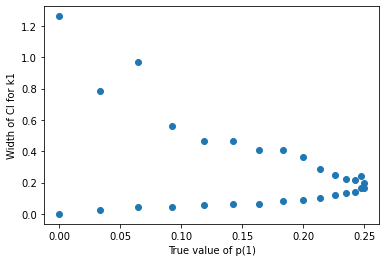

In [13]:
# estimate 
x_max = 4
true_p0 = []
true_p1 = []
solution_variance = []
for k1 in np.linspace(0,1,30):
    # compute CI bounds on p(x)'s
    estimates, intervals = bootstrap([x for x in range(x_max)],0,k1,1,100,1000,1000)
    # solve BD LP and find solution interval width
    pl = [intv[0] for intv in intervals]
    pu = [intv[1] for intv in intervals]
    lb, ub = birth_death_LP([0],pl,pu)
    solution_variance.append(ub - lb)
    # plot against true value of p(0)
    true_p0.append(1 - k1)
    true_p1.append((1-k1)*k1)
plt.scatter(true_p0,solution_variance)
plt.xlabel("True value of p(0)")
plt.ylabel("Width of CI for k1")
plt.show()
plt.scatter(true_p1,solution_variance)
plt.xlabel("True value of p(1)")
plt.ylabel("Width of CI for k1")
plt.show()

Plot width of solution interval against n:
- when using equation n to solve: involves p(n-1), p(n), p(n+1)

Type error for equation 6
Type error for equation 7
Type error for equation 8
Type error for equation 9
Type error for equation 10
Type error for equation 11
Type error for equation 12
Type error for equation 13
Type error for equation 14
Type error for equation 15
Type error for equation 16
Type error for equation 17
Type error for equation 18
Type error for equation 19


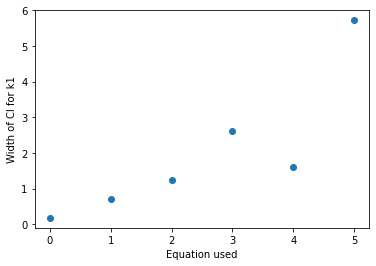

In [20]:
solution_width = []
equation = []
for k1 in [0.5]:
    for n in range(20):
        # compute CI bounds on p(x)'s [equation n, need bounds on p(n+1)]
        estimates, intervals = bootstrap([x for x in range(n + 2)],0,k1,1,100,1000,1000)
        # using equation n: solve LP
        pl = [intv[0] for intv in intervals]
        pu = [intv[1] for intv in intervals]
        lb, ub = birth_death_LP([n],pl,pu)
        try:
            solution_width.append(ub - lb)
            equation.append(n)
        except TypeError:
            print(f"Type error for equation {n}")
plt.scatter(equation,solution_width)
plt.xlabel("Equation used")
plt.ylabel("Width of CI for k1")
plt.show()

C:\Users\willi\AppData\Local\Temp\ipykernel_30580\546057611.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  t_hold = -math.log(random.random()) / (birth_rate + death_rate)
C:\Users\willi\AppData\Local\Temp\ipykernel_30580\546057611.py:31: RuntimeWarning: invalid value encountered in double_scalars
  if u < birth_rate / (birth_rate + death_rate):


Type error for equation 2
Type error for equation 1
Type error for equation 1
Type error for equation 2
Type error for equation 1
Type error for equation 2
Type error for equation 1
Type error for equation 1
Type error for equation 2
Type error for equation 1
Type error for equation 2
Type error for equation 1
Type error for equation 2


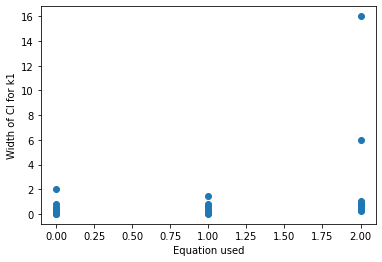

In [17]:
solution_width = []
equation = []
for k1 in np.linspace(0,1,20):
    for n in range(3):
        # compute CI bounds on p(x)'s [equation n, need bounds on p(n+1)]
        estimates, intervals = bootstrap([x for x in range(n + 2)],0,k1,1,100,1000,1000)
        # using equation n: solve LP
        pl = [intv[0] for intv in intervals]
        pu = [intv[1] for intv in intervals]
        lb, ub = birth_death_LP([n],pl,pu)
        try:
            solution_width.append(ub - lb)
            equation.append(n)
        except TypeError:
            print(f"Type error for equation {n}")
plt.scatter(equation,solution_width)
plt.xlabel("Equation used")
plt.ylabel("Width of CI for k1")
plt.show()